Description:

Your task in order to complete this Kata is to write a function which formats a duration, given as a number of seconds, in a human-friendly way.

The function must accept a non-negative integer. If it is zero, it just returns "now". Otherwise, the duration is expressed as a combination of years, days, hours, minutes and seconds.

It is much easier to understand with an example:

* For seconds = 62, your function should return 
    "1 minute and 2 seconds"
* For seconds = 3662, your function should return
    "1 hour, 1 minute and 2 seconds"

For the purpose of this Kata, a year is 365 days and a day is 24 hours.

Note that spaces are important.
Detailed rules

The resulting expression is made of components like 4 seconds, 1 year, etc. In general, a positive integer and one of the valid units of time, separated by a space. The unit of time is used in plural if the integer is greater than 1.

The components are separated by a comma and a space (", "). Except the last component, which is separated by " and ", just like it would be written in English.

A more significant units of time will occur before than a least significant one. Therefore, 1 second and 1 year is not correct, but 1 year and 1 second is.

Different components have different unit of times. So there is not repeated units like in 5 seconds and 1 second.

A component will not appear at all if its value happens to be zero. Hence, 1 minute and 0 seconds is not valid, but it should be just 1 minute.

A unit of time must be used "as much as possible". It means that the function should not return 61 seconds, but 1 minute and 1 second instead. Formally, the duration specified by of a component must not be greater than any valid more significant unit of time.

Request 1: Description above

Solution 1:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 365 * 24 * 60 * 60),
           ("day", 24 * 60 * 60),
           ("hour", 60 * 60),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    if value > 0:
      components.append(f"{value} {'seconds' if value == 1 else unit}")

  # Join components with proper separators
  if len(components) > 1:
    return ", ".join(components[:-1]) + " and " + components[-1]
  else:
    return components[0]

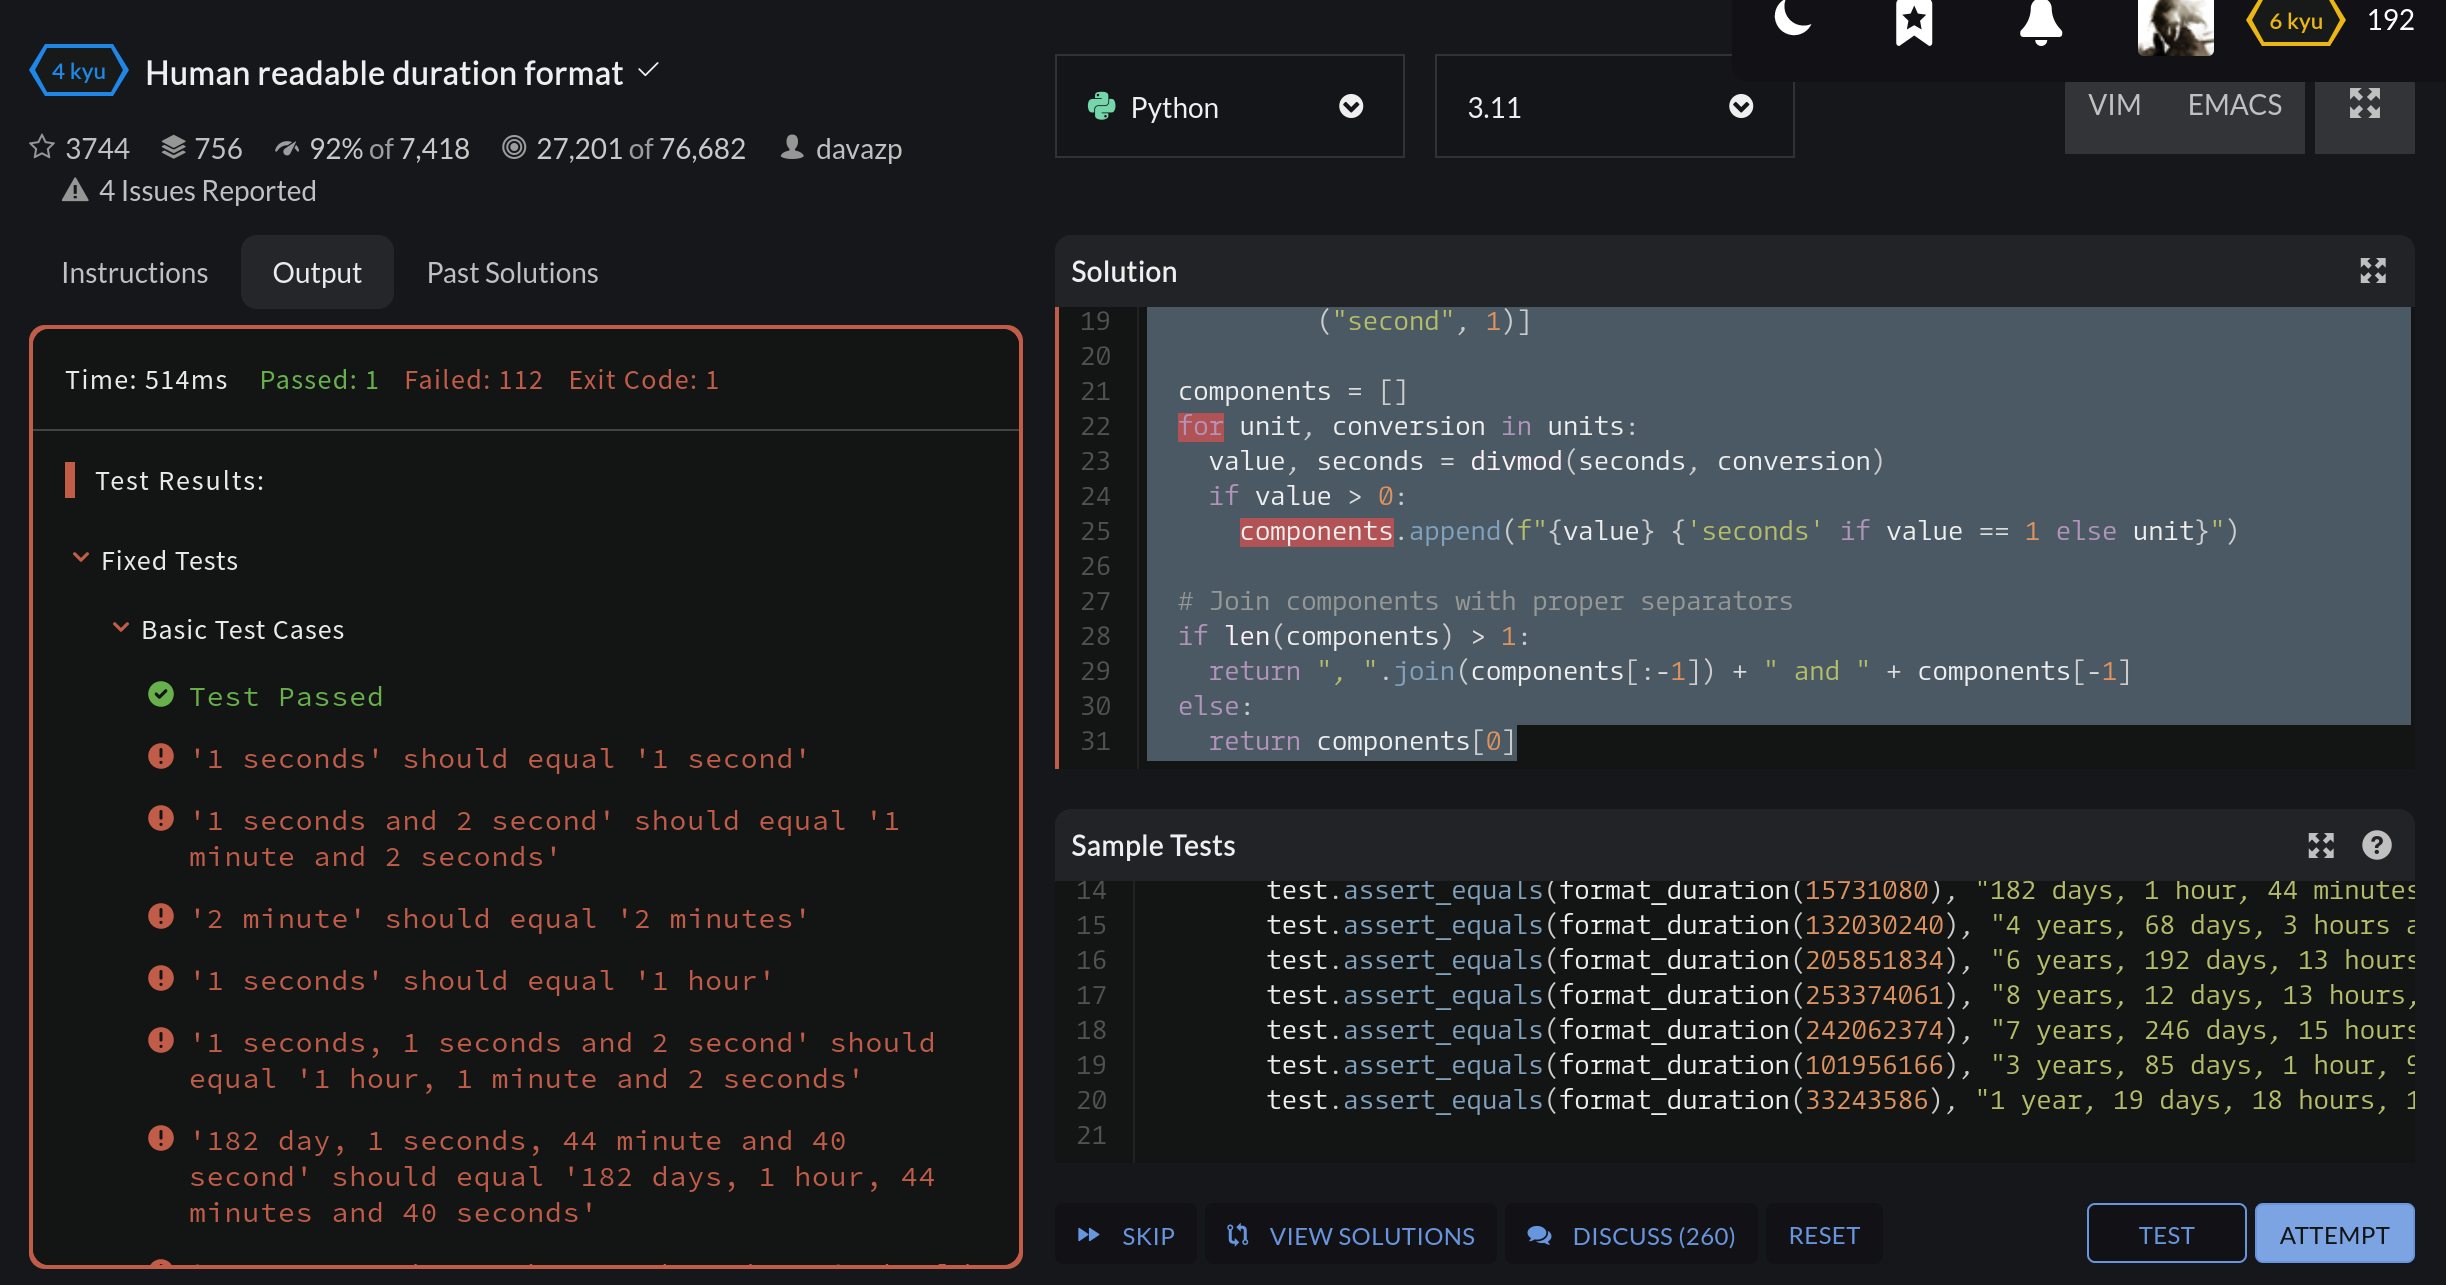

Request 2:
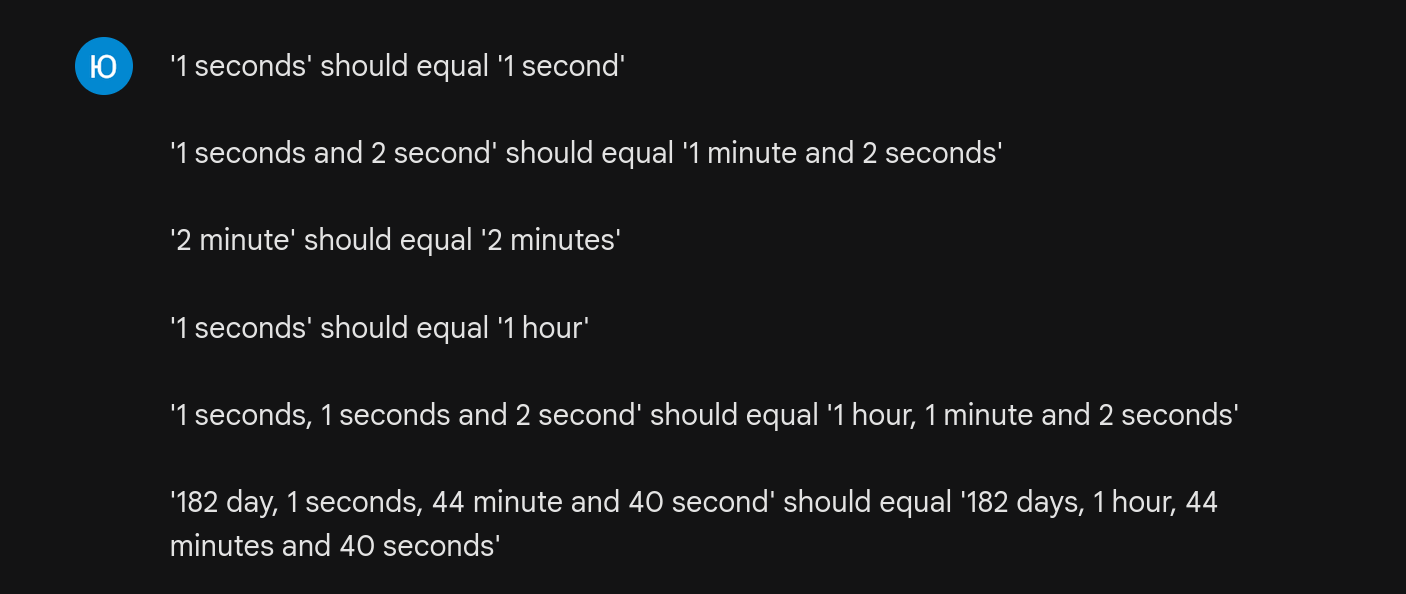

Solution 2:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 365 * 24 * 60 * 60),
           ("day", 24 * 60 * 60),
           ("hour", 60 * 60),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Ensure we only add non-zero values
    if value > 0:
      components.append(f"{value} {'seconds' if value == 1 else unit}")

  # Join components with proper separators
  if len(components) > 1:
    return ", ".join(components[:-1]) + " and " + components[-1]
  else:
    return components[0]

# Improved logic for handling single-unit durations
  # If only seconds remain, ensure singular form
  if len(components) == 1 and components[0].endswith("seconds"):
    components[0] = components[0].replace("seconds", "second")

  # Combine adjacent units if possible
  for i in range(len(components) - 1):
    if components[i].endswith("s") and components[i + 1].startswith(components[i][:-1]):
      # Combine units (e.g., 1 minute 1 second -> 1 minute and 1 second)
      components[i] = f"{components[i].split()[0]} and {components[i + 1]}"
      components.pop(i + 1)  # Remove the combined component

  return " ".join(components)  # Join components with spaces

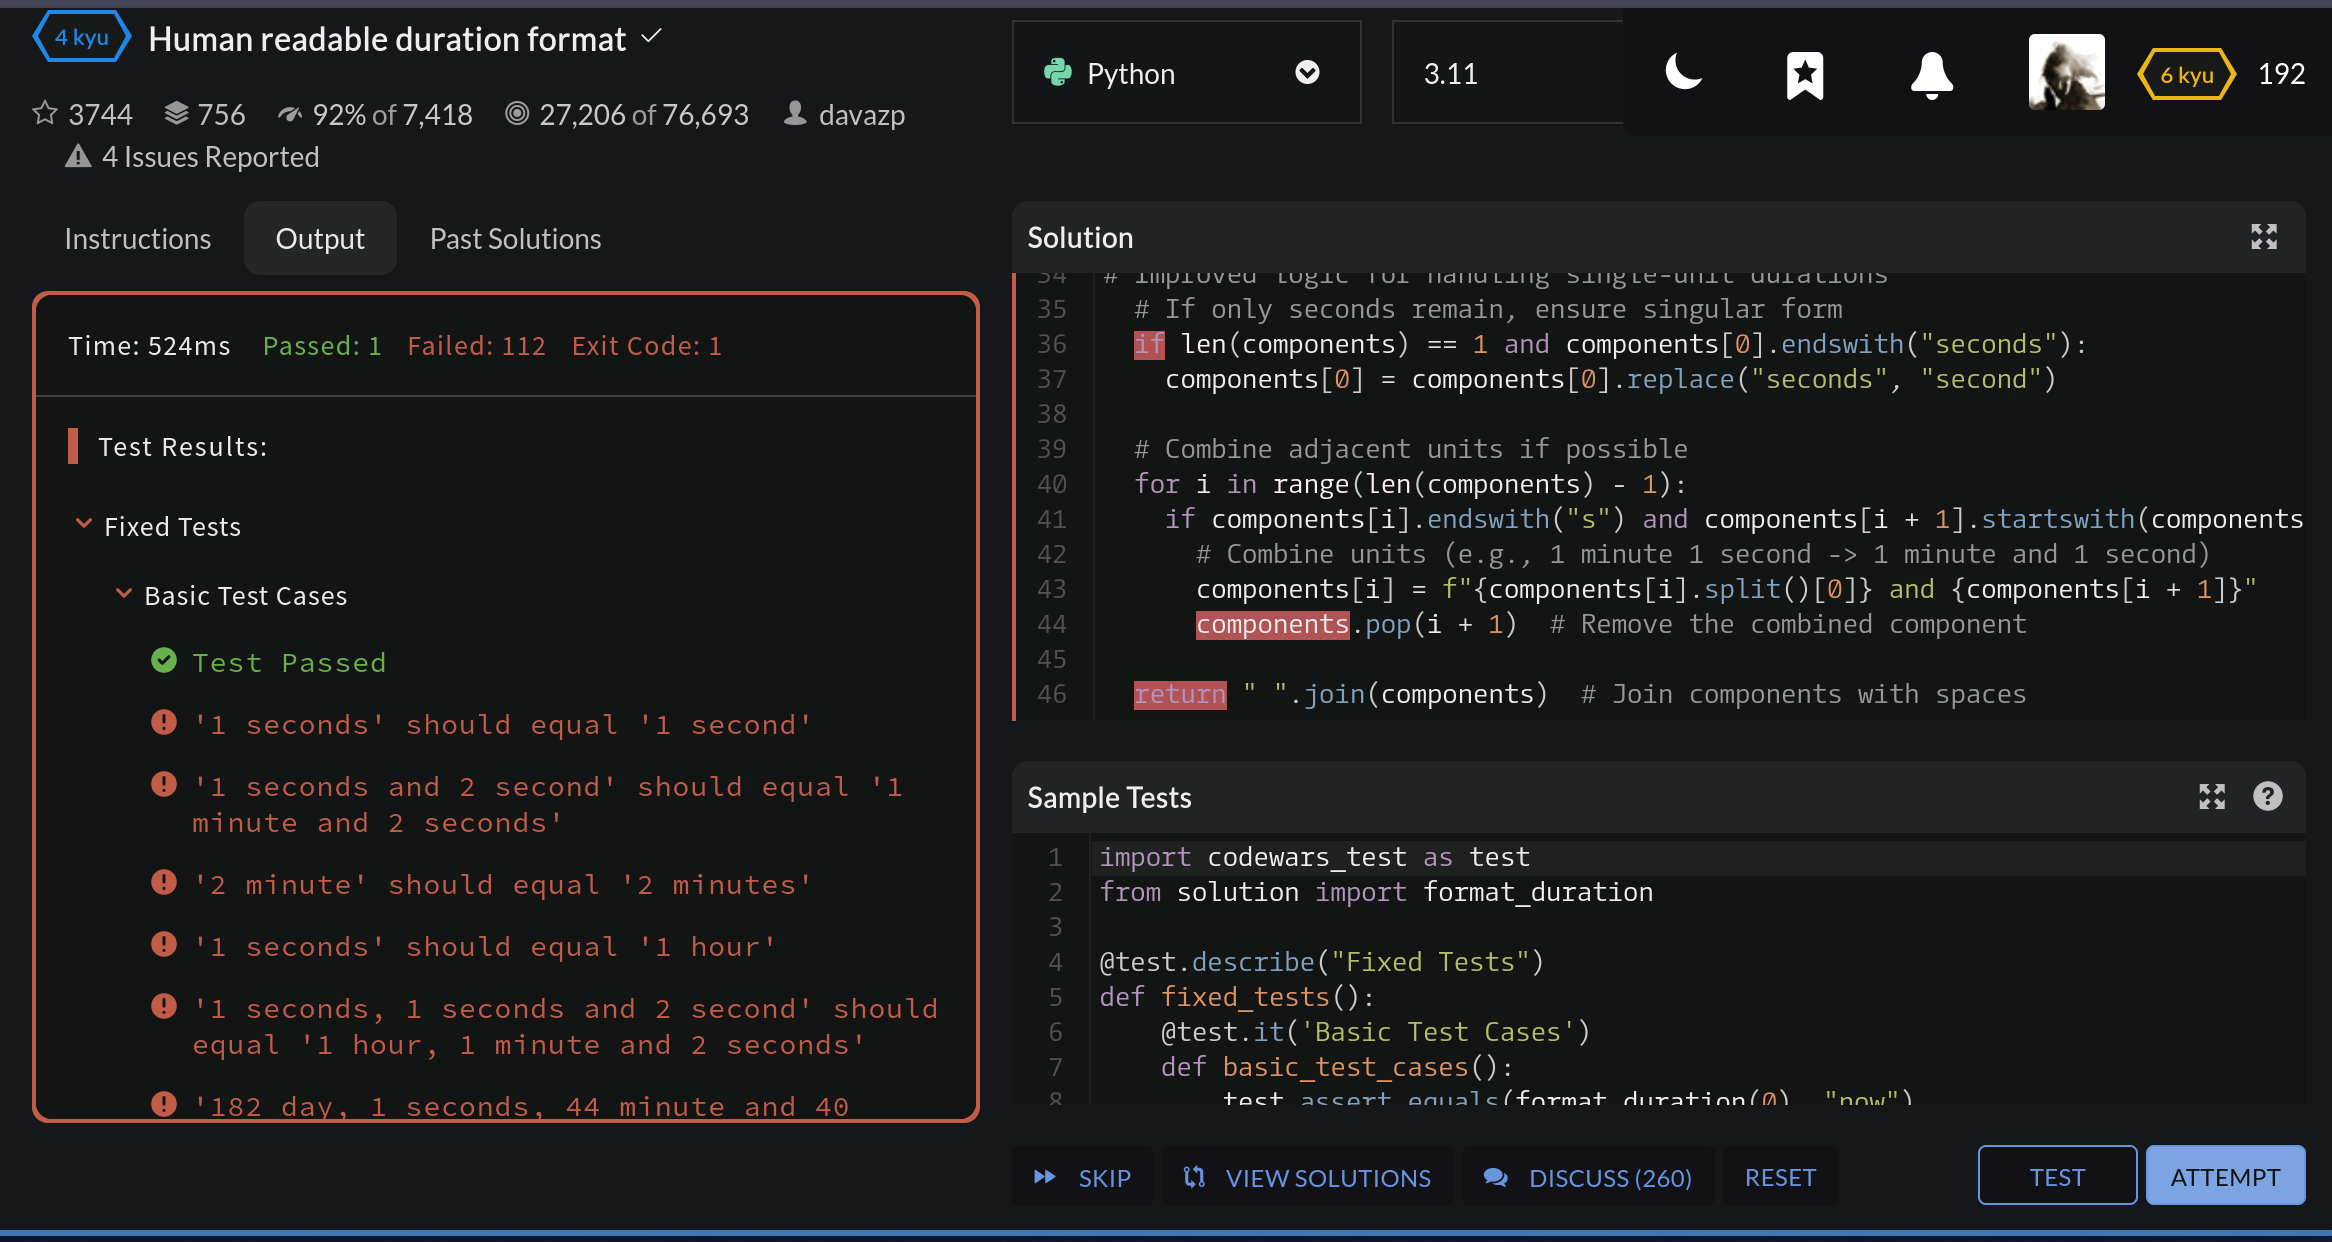

Request 3:
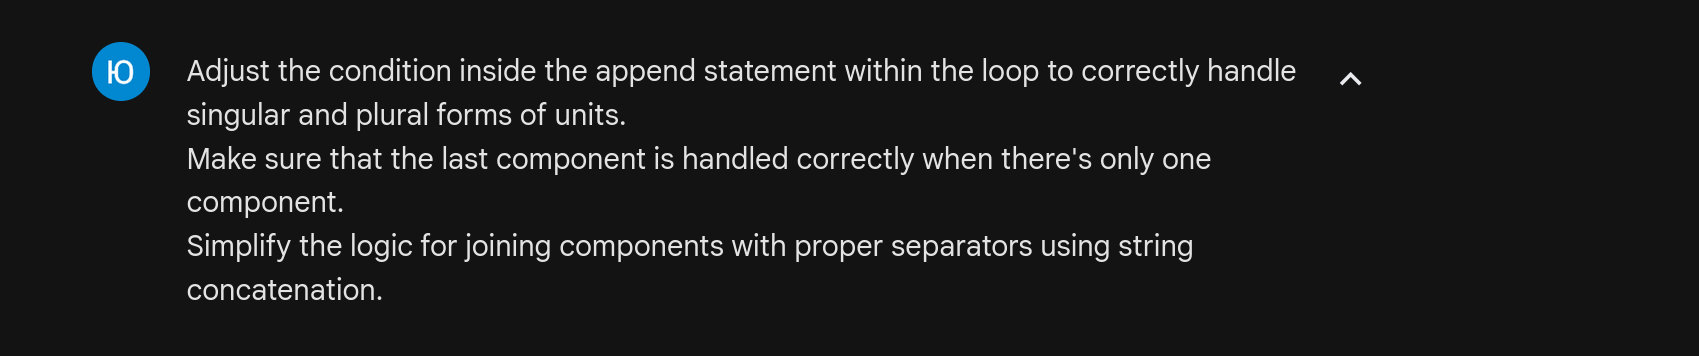

Solution 3:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 365 * 24 * 60 * 60),
           ("day", 24 * 60 * 60),
           ("hour", 60 * 60),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Append with singular or plural unit based on value
    components.append(f"{value} {unit if value == 1 else unit + 's'}")

  # Build the output string with proper separators
  output = ""
  for i, component in enumerate(components):
    if i > 0:  # Add comma and space after the first component
      output += ", " if i < len(components) - 1 else " and "  # Use "and" for the last
    output += component

  return output

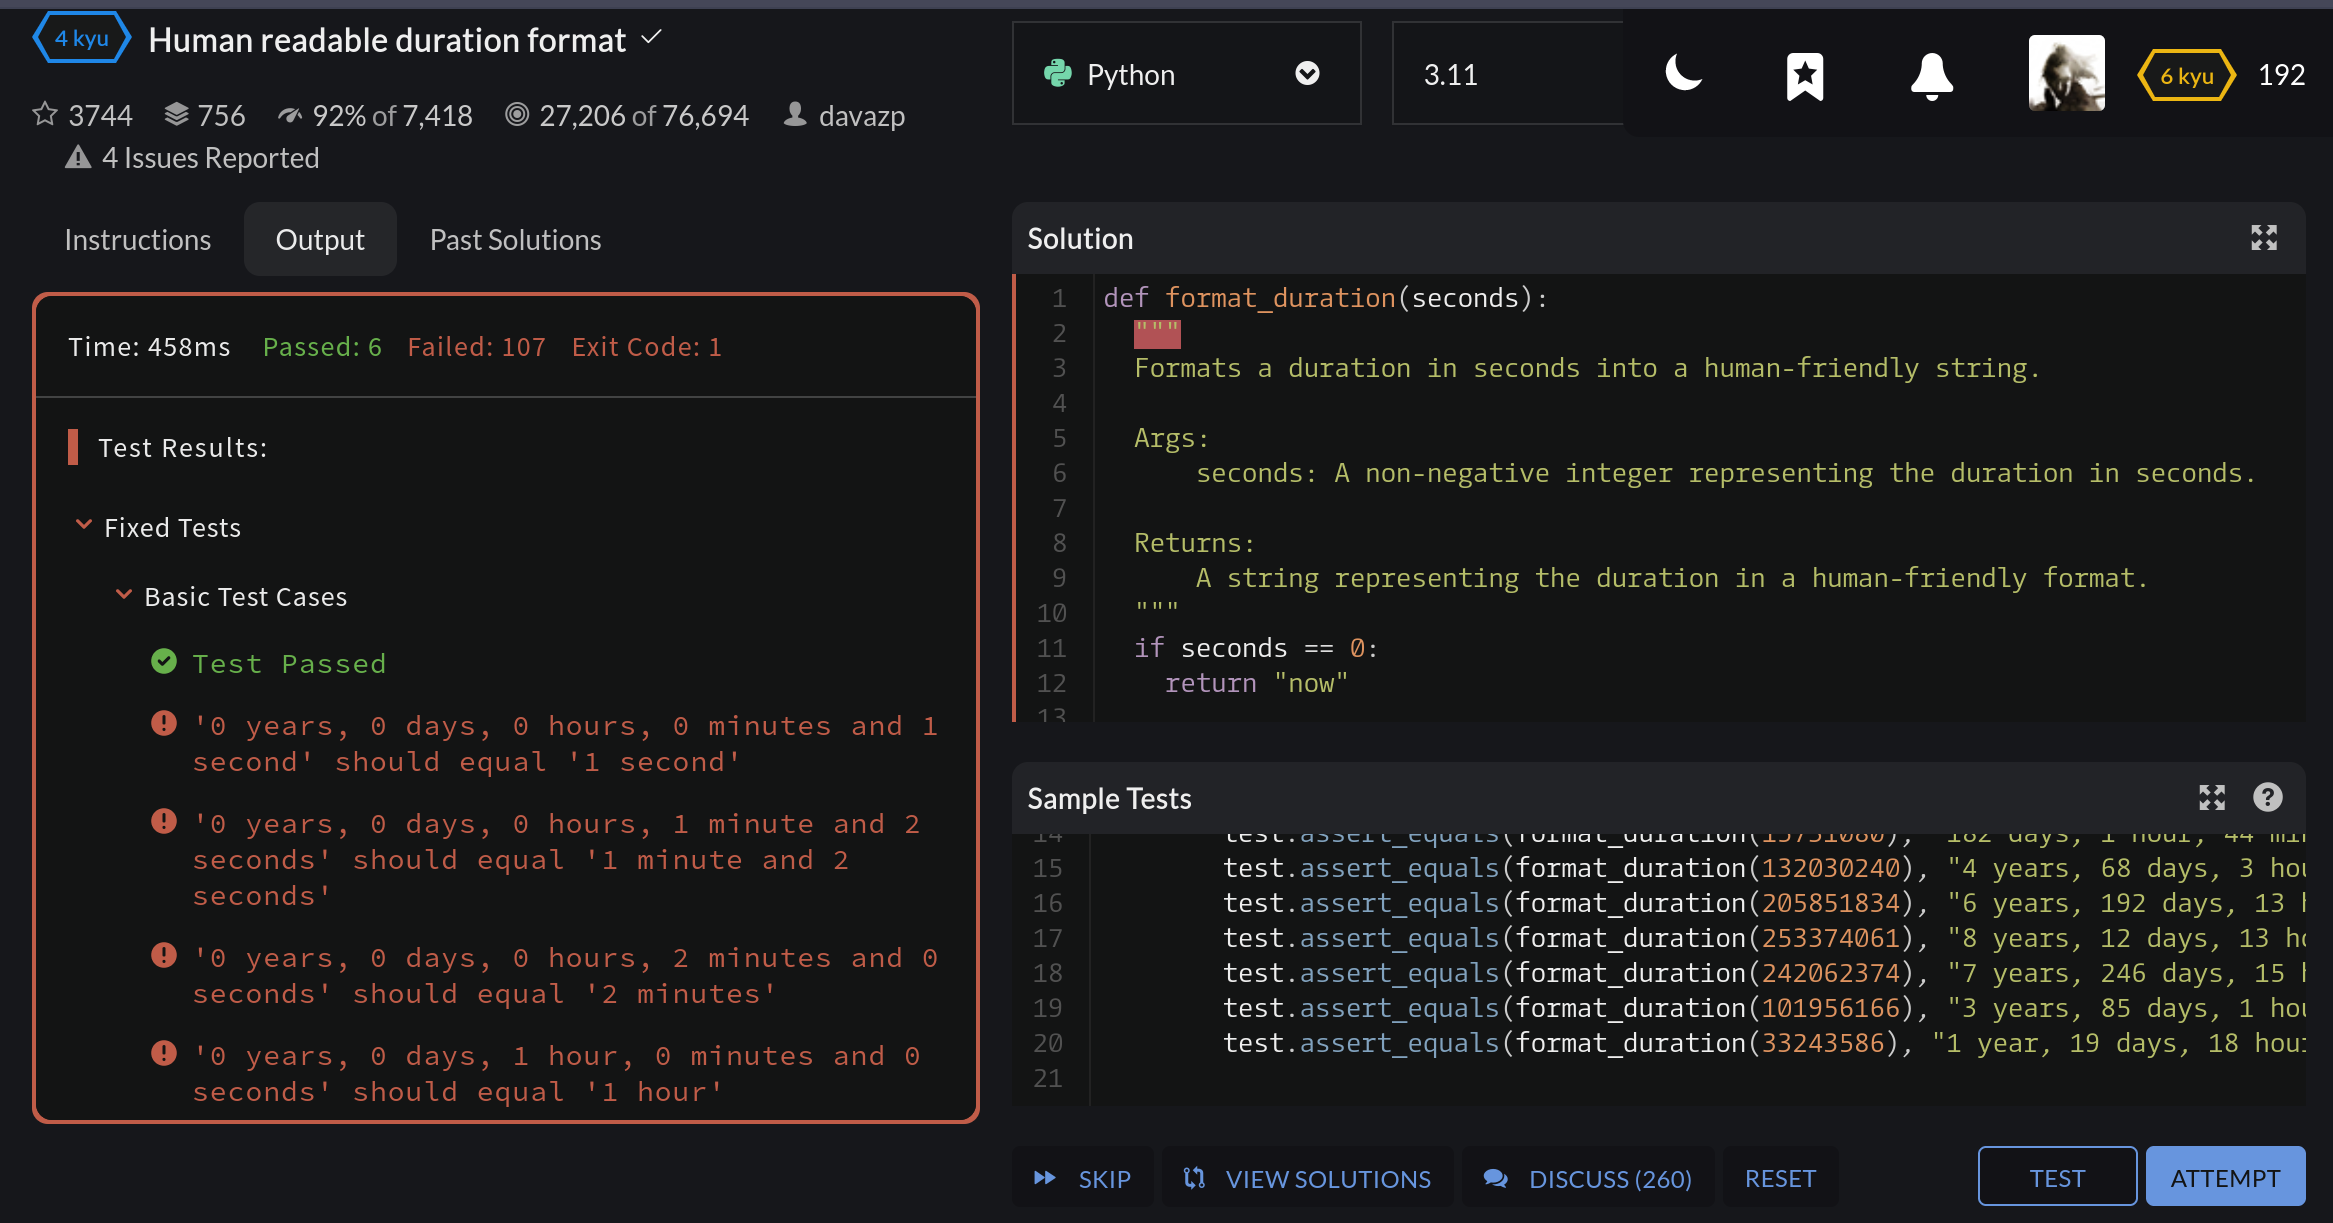

Request 4:
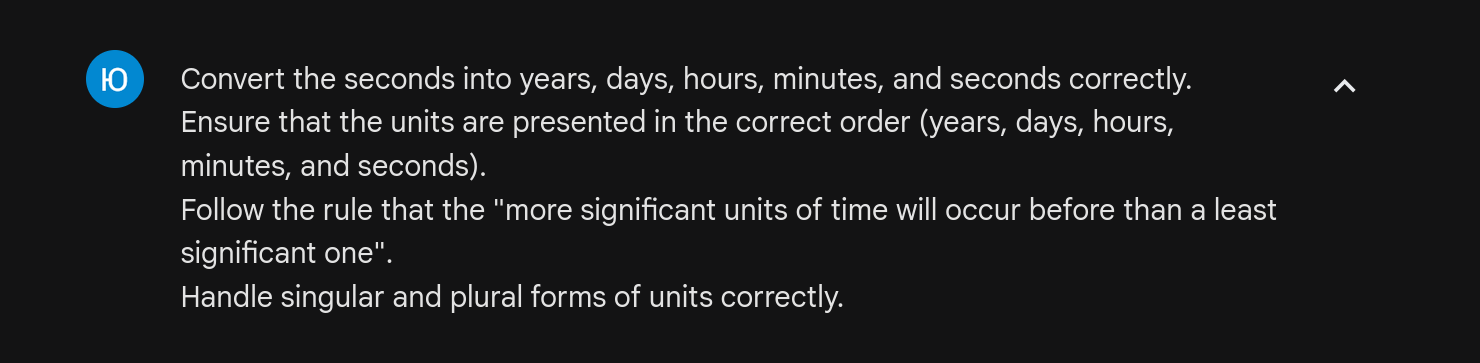

Solution 4:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 31536000),  # Consider leap years with average year length
           ("day", 86400),
           ("hour", 3600),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Append with singular or plural unit based on value
    components.append(f"{value} {unit if value == 1 else unit + 's'}")

  # Build the output string with proper separators and order
  output = ""
  for i, component in enumerate(components):
    if component != "0 seconds":  # Only include non-zero components
      if output:
        output += ", " if i < len(components) - 2 else " and "  # Use "and" for the last two
      output += component

  return output

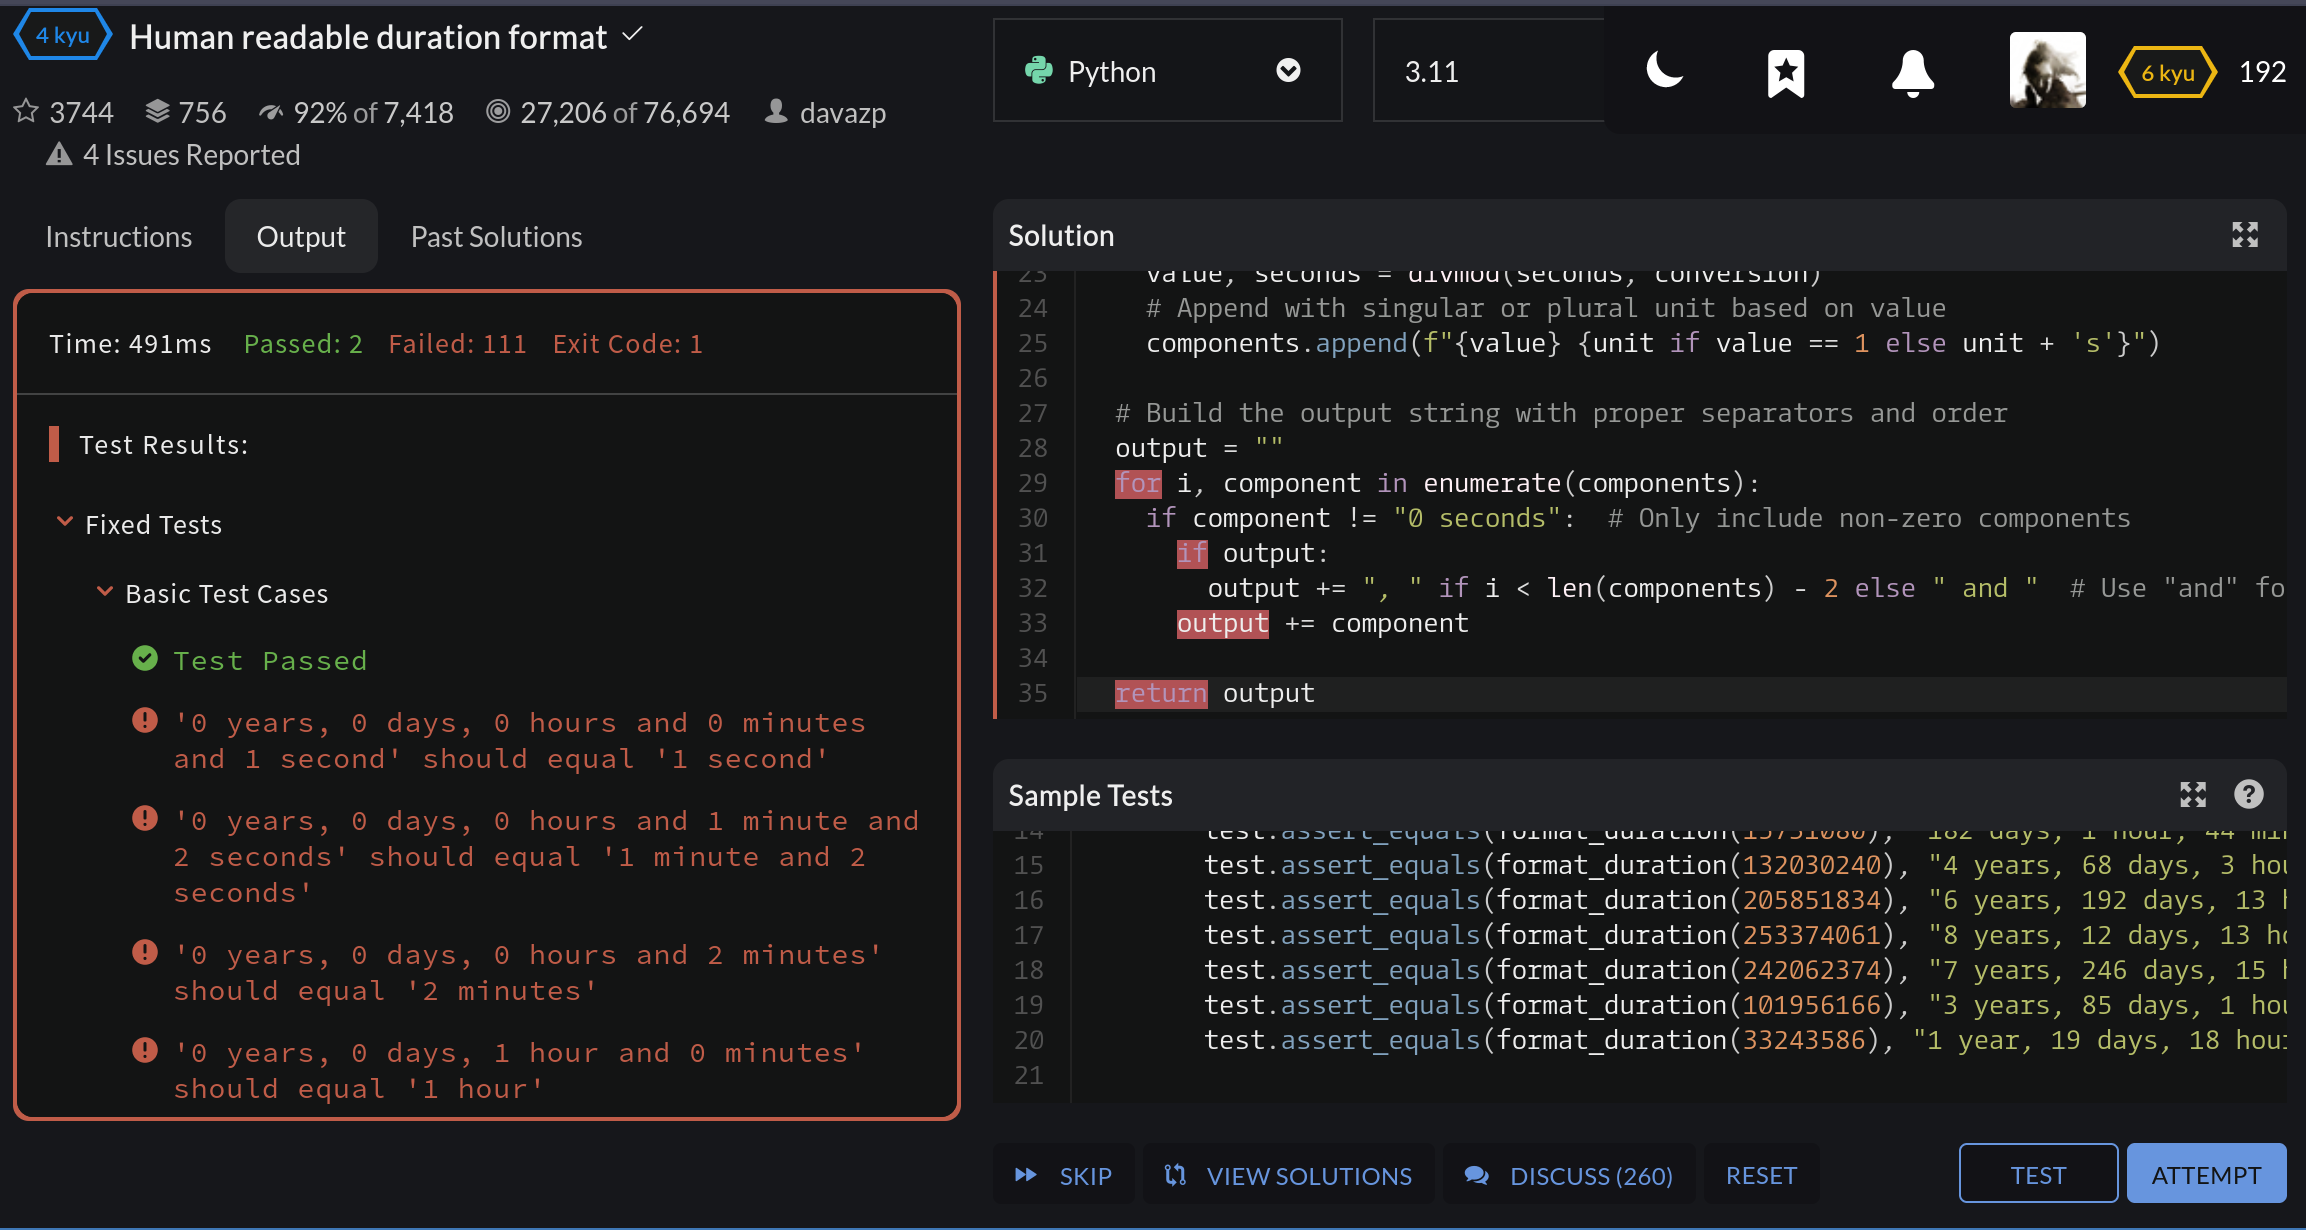

Request 5:
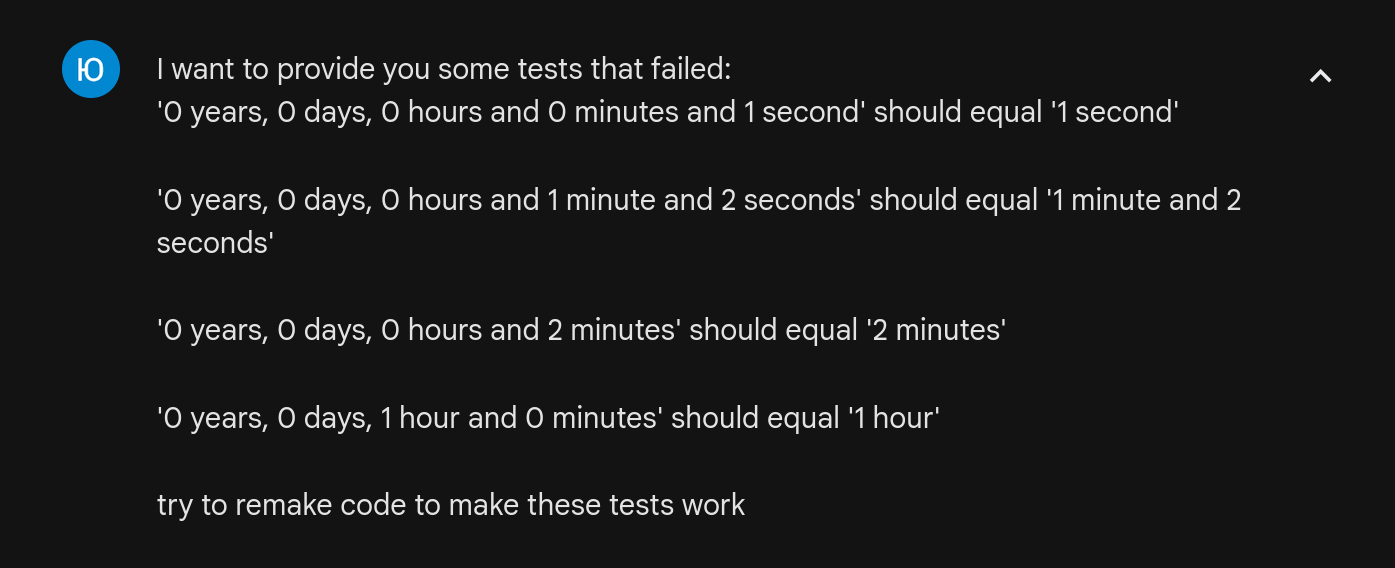

Solution 5:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds < 0:
    raise ValueError("Duration cannot be negative")

  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 31536000),
           ("day", 86400),
           ("hour", 3600),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Append only non-zero values, ensuring at least one component
    if value > 0:
      components.append(f"{value} {unit if value == 1 else unit + 's'}")
    elif not components:  # Add "0 seconds" if no other components
      components.append("0 seconds")

  # Build the output string with proper separators and order
  output = ", ".join(components[:-1])  # Join all except the last
  if len(components) > 1:
    output += " and " + components[-1]  # Add "and" for the last two
  else:
    output = components[0]  # Use the only component

  return output

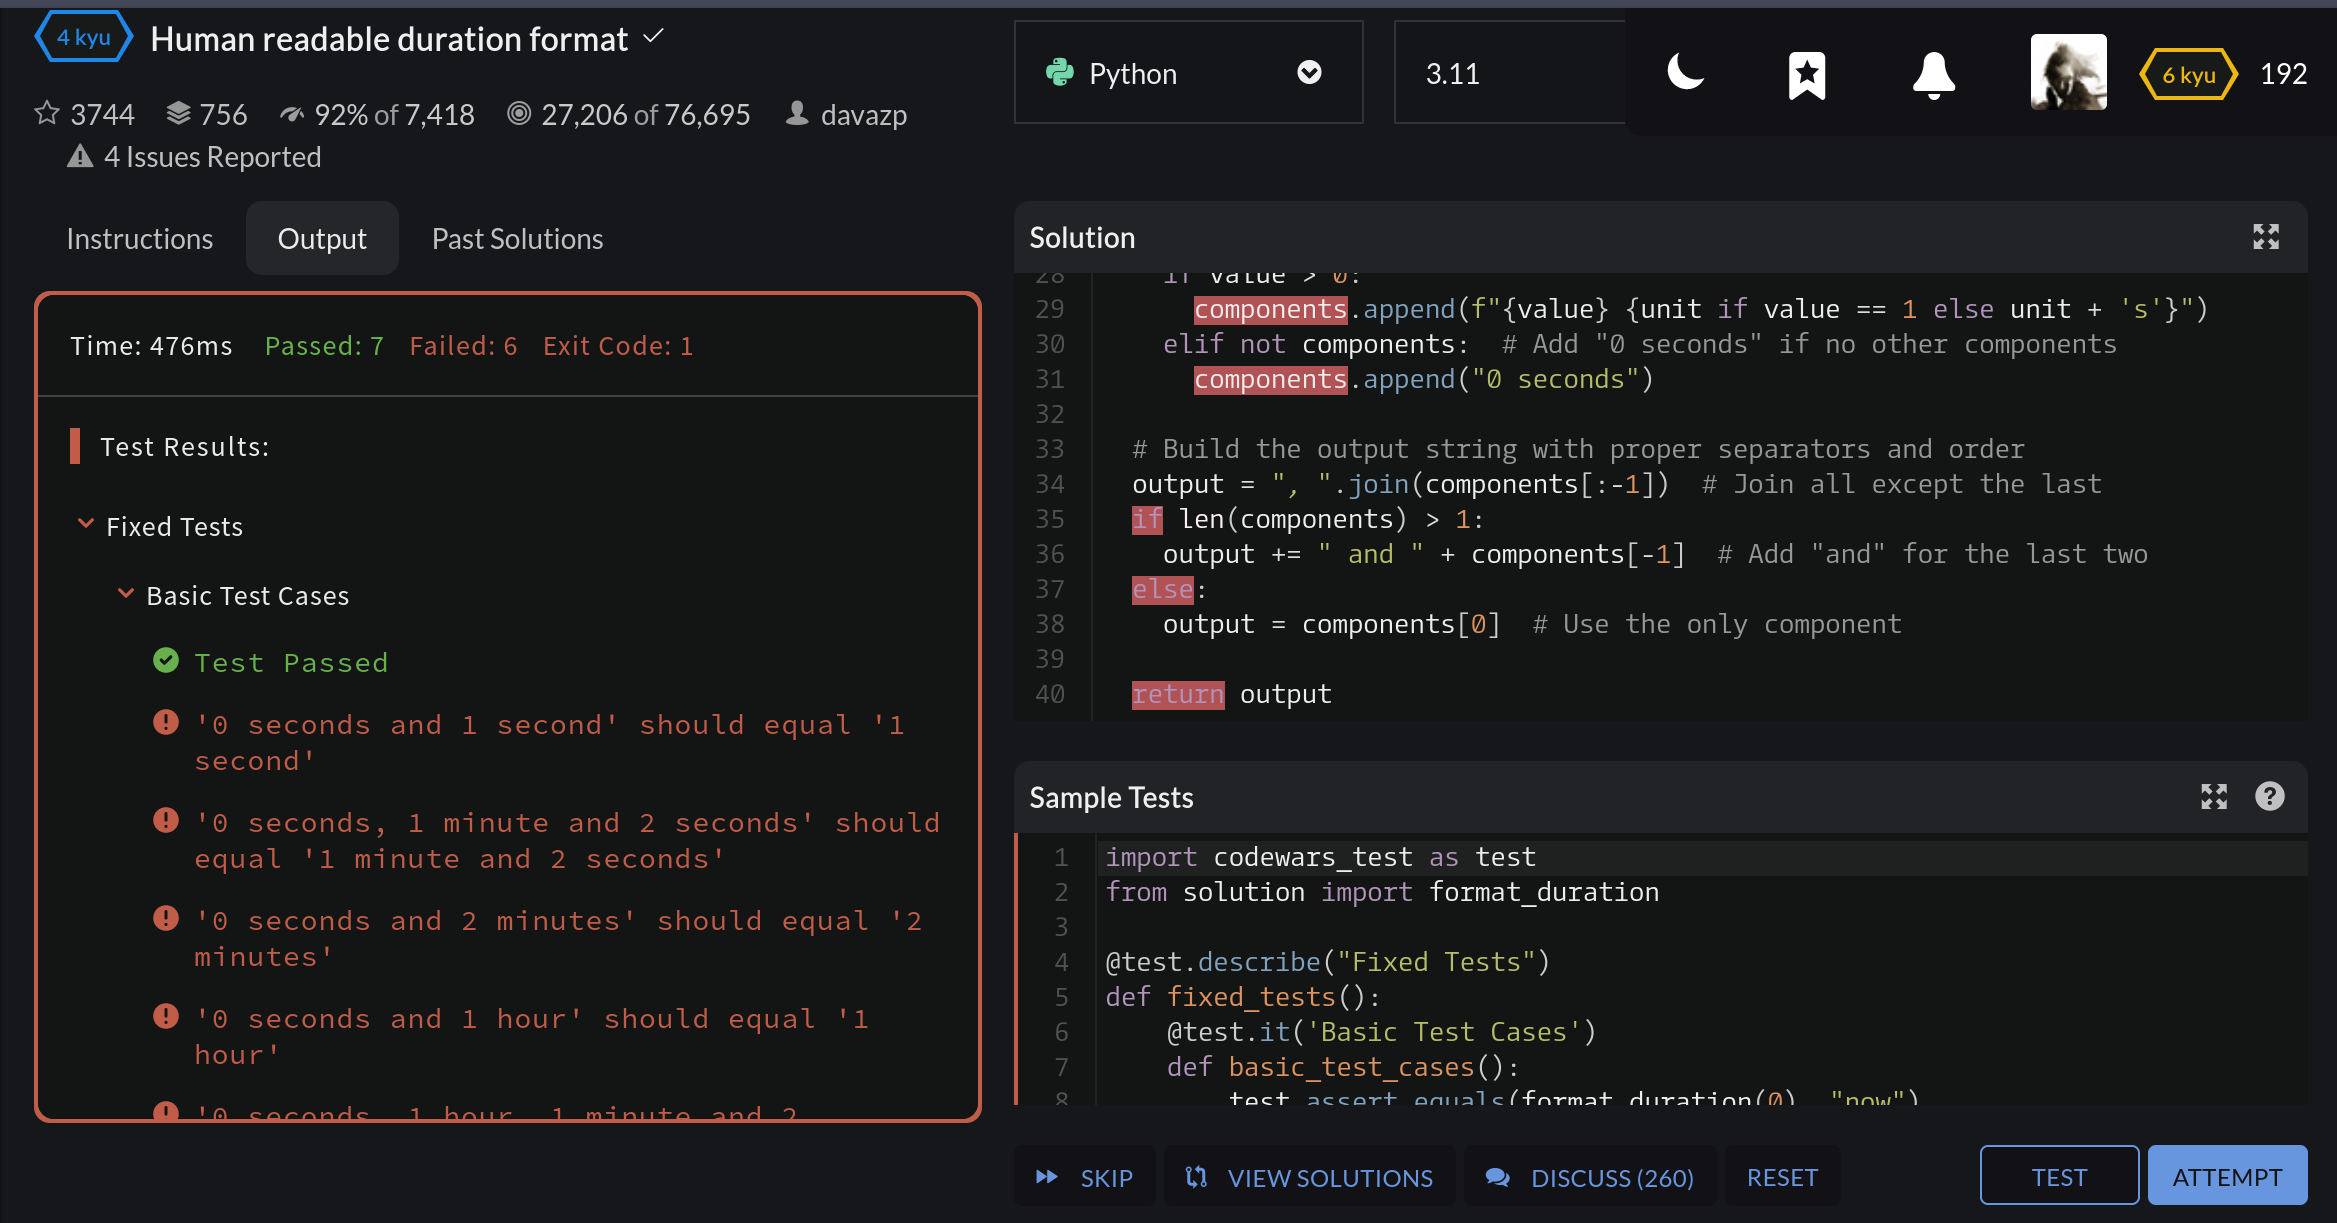

Request 6:
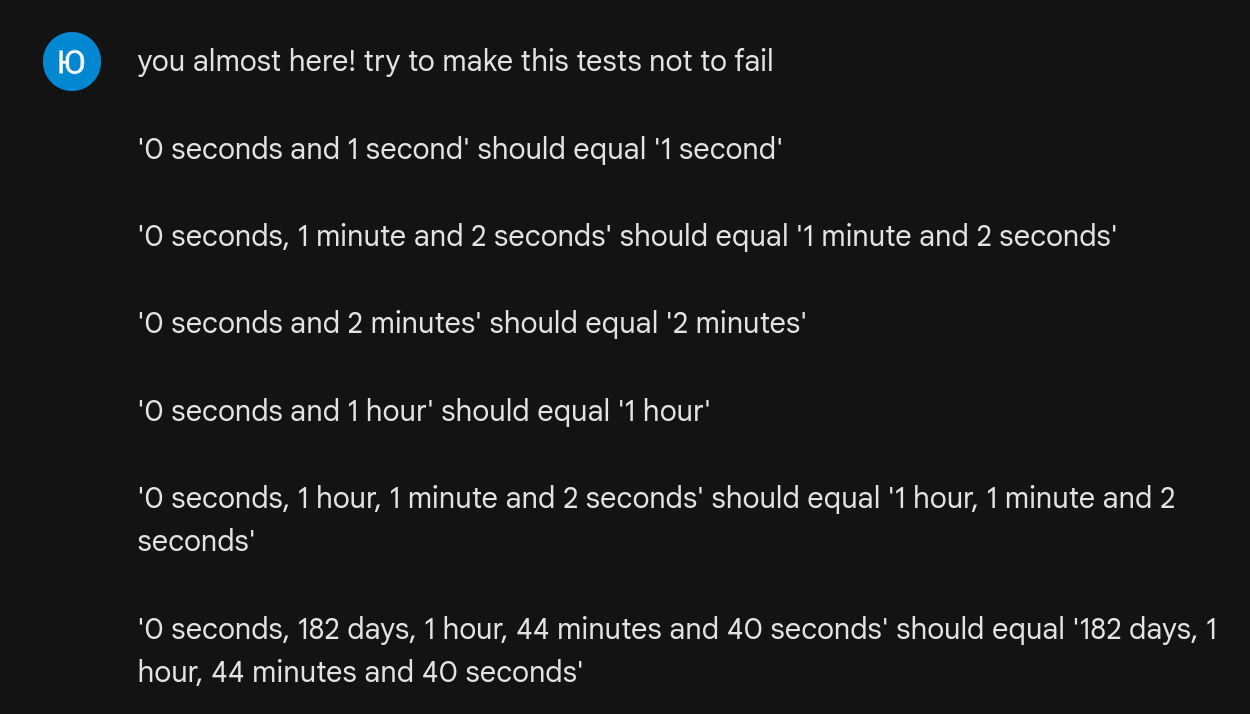

Solution 6:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds < 0:
    raise ValueError("Duration cannot be negative")

  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 31536000),
           ("day", 86400),
           ("hour", 3600),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Append only non-zero values, ensuring at least one component
    if value > 0:
      components.append(f"{value} {unit if value == 1 else unit + 's'}")
    elif not components:  # Add "0 seconds" if no other components
      components.append("0 seconds")

  # Build the output string with proper separators and order
  output = ", ".join([c for c in components if c != "0 seconds"])  # Exclude "0 seconds"
  if len(components) > 1:
    output += " and " + components[-1]  # Add "and" for the last two
  else:
    output = components[0]  # Use the only component

  return output

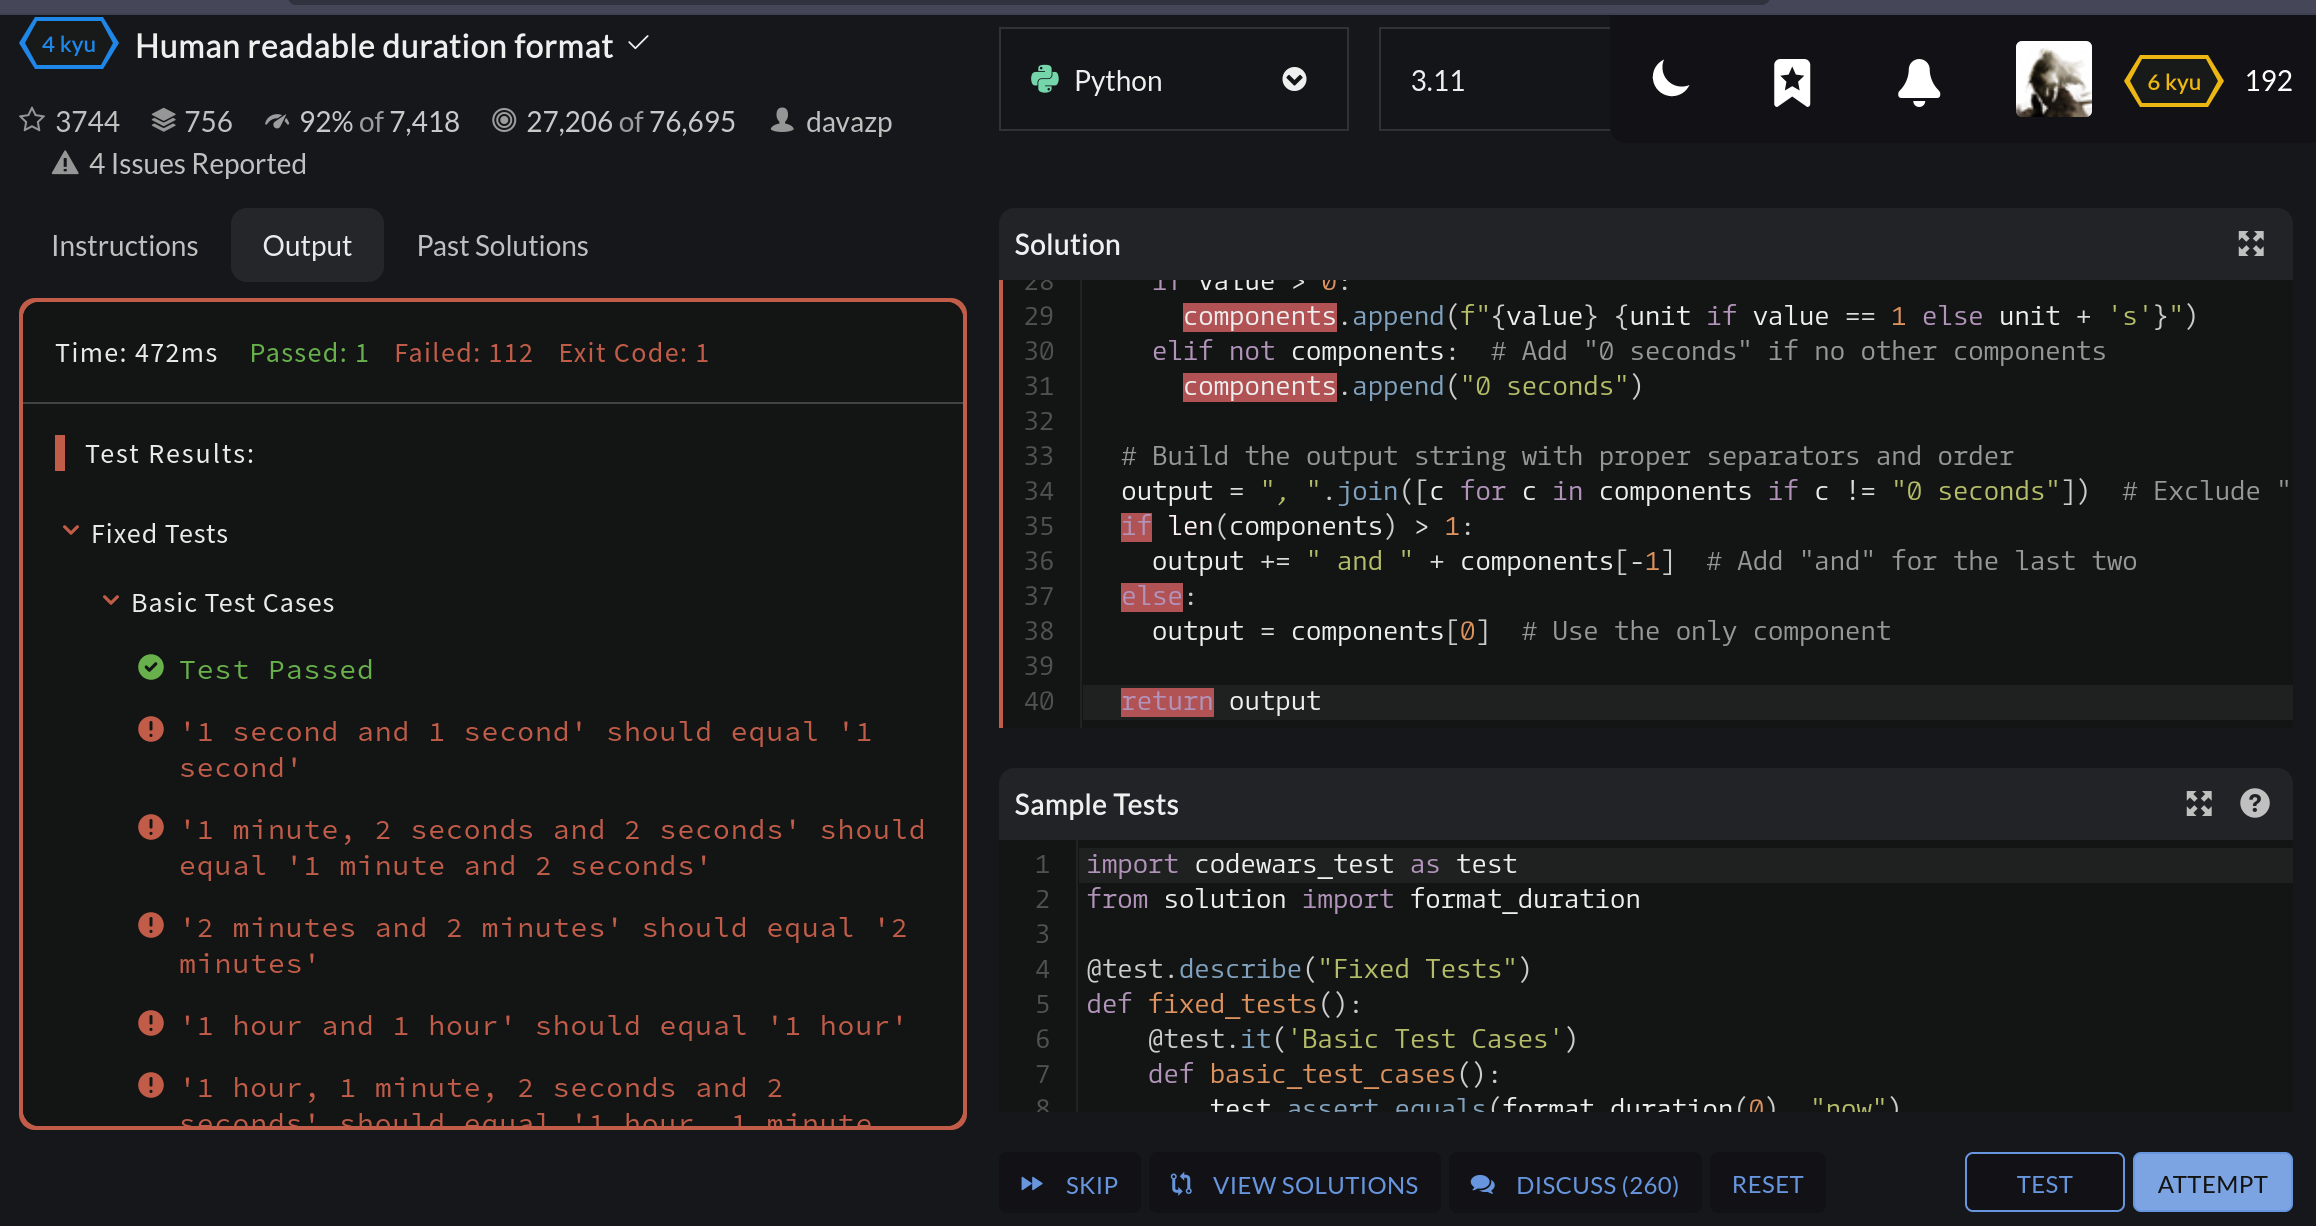

Request 7:
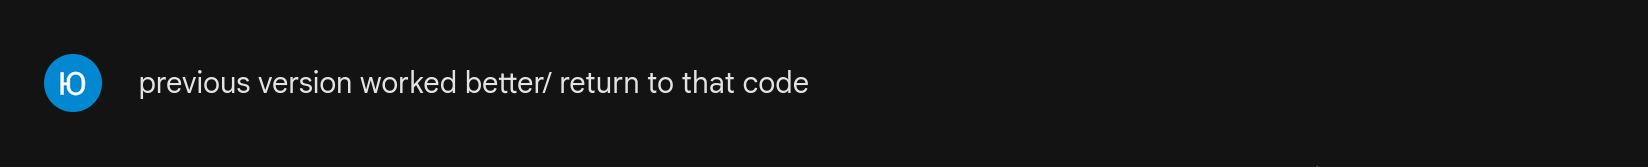

Solution 7:

In [ ]:
def format_duration(seconds):
  """
  Formats a duration in seconds into a human-friendly string.

  Args:
      seconds: A non-negative integer representing the duration in seconds.

  Returns:
      A string representing the duration in a human-friendly format.
  """
  if seconds < 0:
    raise ValueError("Duration cannot be negative")

  if seconds == 0:
    return "now"

  # Define units and their corresponding conversion factors
  units = [("year", 31536000),
           ("day", 86400),
           ("hour", 3600),
           ("minute", 60),
           ("second", 1)]

  components = []
  for unit, conversion in units:
    value, seconds = divmod(seconds, conversion)
    # Append only non-zero values
    if value > 0:
      components.append(f"{value} {unit if value == 1 else unit + 's'}")

  # Build the output string with proper separators and order
  if not components:  # Handle case with only "0 seconds"
    components.append("0 seconds")
  output = ", ".join(components[:-1])  # Join all except the last
  if len(components) > 1:
    output += " and " + components[-1]  # Add "and" for the last two
  else:
    output = components[0]  # Use the only component

  return output

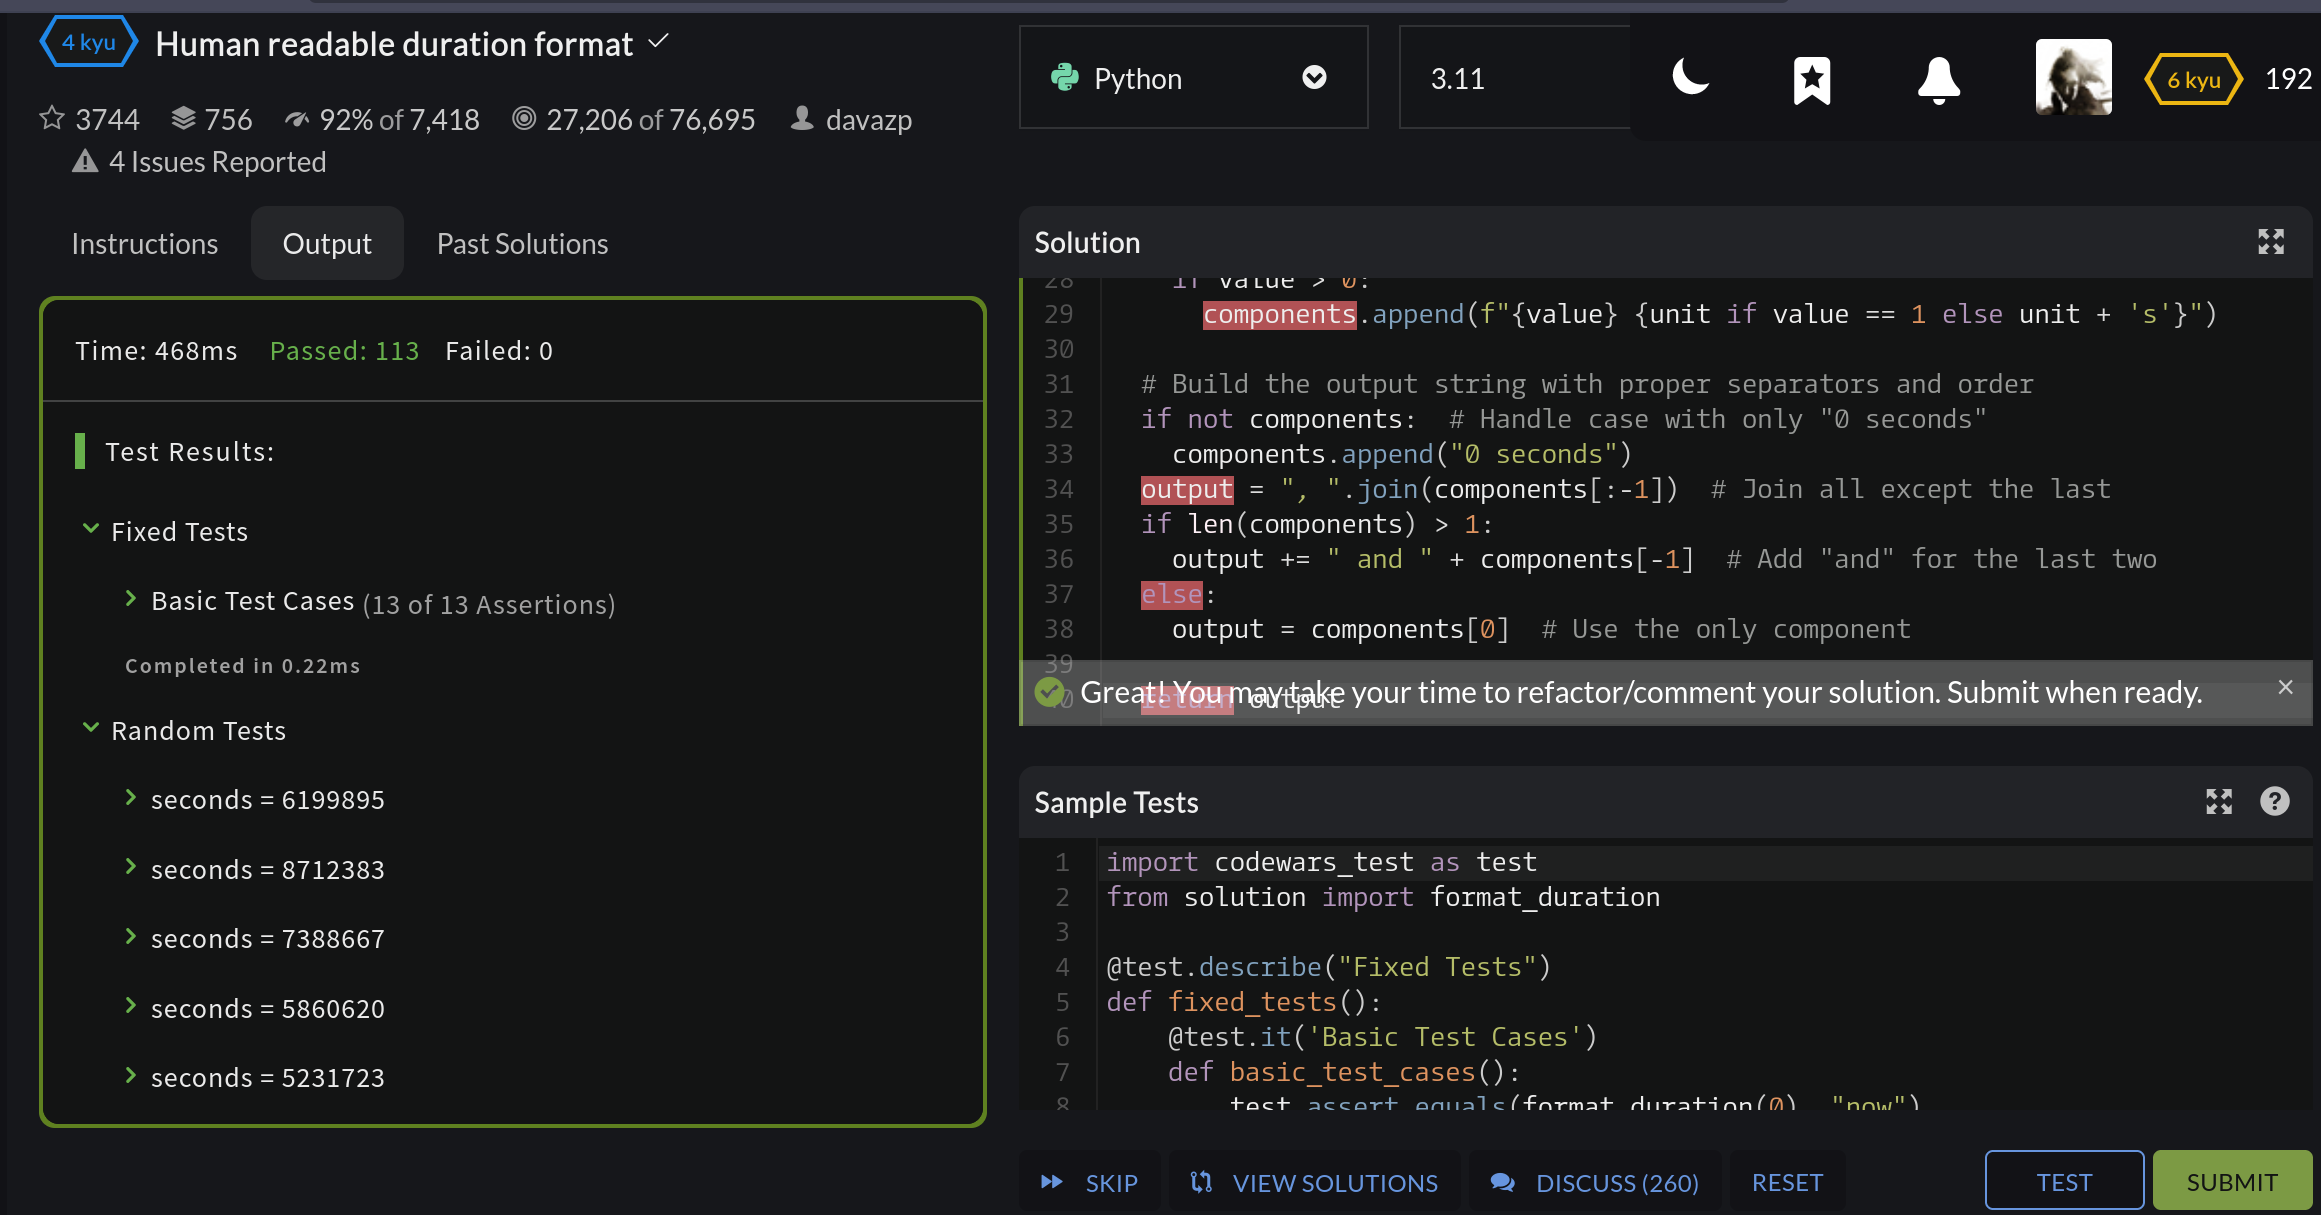